In [1]:
from keras.models import load_model
from keras.utils import np_utils
import numpy as np

/home/yg/.local/share/virtualenvs/Application-Traffic-Identification-8Rjd059g/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
model = load_model('my_model.h5')
# model.load_weights('my_model_weights.h5')

In [3]:
X_test = np.load('X_hf.npy')
y_test = np.load('y_hf.npy')
print(y_test)
X_test = X_test.reshape(-1, 1, 230, 90)
y_test = np_utils.to_categorical(y_test, num_classes=5)

print(X_test.shape)
print(y_test.shape)

[4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4.]
(100, 1, 230, 90)
(100, 5)


In [4]:
print('\nTesting ------------')

loss, accuracy = model.evaluate(X_test, y_test)

print('\ntest loss: ', loss)
print('\ntest accuracy: ', accuracy)


Testing ------------
100/100 [==============================] - 1s 10ms/step

test loss:  0.0826597648859024

test accuracy:  0.99


In [6]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

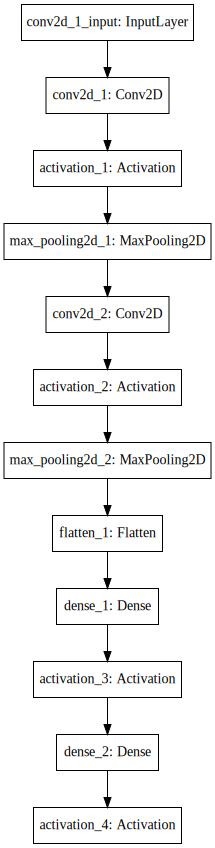

In [7]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [14]:
res_array = model.predict(X_test, verbose=1)
res = np.argmax(res_array, 1)
print(res)
for i in res:
    if i != 4:
        print(i)

100/100 [==============================] - 0s 2ms/step
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
1
